# **Project Name**    -  **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Anjali Patel**

# **Project Summary -**

In our Retail Sales prediction capstone project, we began by meticulously cleaning and wrangling the data from two CSV files: Rossmann Stores Data and Store Data. These datasets contained a total of 19 variables, each providing valuable information.

The subsequent step involved an in-depth Exploratory Data Analysis (EDA) phase, where we leveraged various visualization charts to gain insights into the data. Notable findings emerged during this analysis, including the strong correlation between sales and the number of customers, the observation of increased sales on Mondays, possibly due to store closures on Sundays. We also identified the positive impact of promotional activities on sales, the tendency for stores to stay open more frequently during school holidays, leading to increased sales compared to state holidays, and other intriguing trends. For instance, we found that store type 'a' consistently had the highest average sales, and Assortment level 'b' (labeled as 'extra') resulted in the highest average sales. Moreover, we noted that school holidays affected only 17.9% of sales.

The subsequent step involved hypothesis testing, where we aimed to determine if stores situated closer to competitors experienced significantly lower sales compared to those further away. The null hypothesis stated that there was no significant difference in sales, while the alternative hypothesis posited that proximity to competition did indeed impact sales. To test these hypotheses, we conducted a two-sample t-test, setting a significance level of 0.05.

Our project then moved on to feature engineering, where we tackled missing values, managed null values, handled columns, eliminated unnecessary features, and conducted feature processing and extraction. We also addressed outliers and performed feature selection to optimize our model.

In the culminating phase of our project, we delved into model deployment. We deployed two regression models, namely the linear regression model and the lasso regression model. Our evaluation of these models revealed that they exhibited quite similar performance, with the lasso regression model slightly outperforming the linear regression model in terms of a lower Mean Squared Error (MSE) and a higher R-squared (R2) score. MSE quantifies the average squared difference between predicted and actual values, with a lower MSE indicating better performance. Meanwhile, the R2 score measures the proportion of variance in the dependent variable that can be predicted by the independent variables, with a higher R2 score indicating superior performance.

# **GitHub Link -**

https://github.com/Newbie810/Regression---Retail-Sales-Pediction.git

# **Problem Statement**


Rossmann, a retail chain operating more than 3,000 drug stores across seven European countries, faces the challenge of accurately predicting daily sales up to six weeks ahead. Various factors influence store sales, such as promotional activities, competition, school and state holidays, seasonal variations, and location-specific dynamics. Given the diverse circumstances of individual store managers, predicting sales with precision can be a complex endeavor.

For this project, you have access to historical sales data from 1,115 Rossmann stores. Your objective is to create forecasts for the "Sales" column in the test dataset. It's worth noting that some stores in the dataset experienced temporary closures for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 10,8

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
# Load Dataset
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Rossman Dataset
# csv file location
csv_file1 = ('/content/drive/MyDrive/Regression - Retail Sales Prediction/Rossmann Stores Data.csv')

# Reading the data set
data_set = pd.read_csv(csv_file1)

# Creating a copy of data set
rossman_data = data_set.copy()

<ipython-input-3-fc0187f38721>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv(csv_file1)


In [4]:
#Loading Store Dataset
# csv file location
csv_file2 = ('/content/drive/MyDrive/Regression - Retail Sales Prediction/store.csv')

# Reading the data set
data_set = pd.read_csv(csv_file2)

# Creating a copy of data set
stores_data = data_set.copy()

### Dataset First View

# **Analysing the Rossman dataset**

In [5]:
# Dataset First Look
# Checking the first 5 rows of data
rossman_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# Checking the bottom 5 rows of the data
rossman_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


# **Analysing the Store dataset**

In [7]:
# Dataset First Look
# Checking the first 5 rows of data
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
# Checking the bottom 5 rows of the data
stores_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count of Rossman dataset
rossman_data.shape

(1017209, 9)

In [10]:
# Dataset Rows & Columns count of Stores dataset
stores_data.shape

(1115, 10)

# **Merging both the datasets together**

In [11]:
# Merge the datasets on stores data
df = rossman_data.merge(right=stores_data, on="Store", how="left")

In [12]:
# First ten rows of the merged dataset
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [14]:
df.shape

(1017209, 18)

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f'There are {len(duplicate_rows)} duplicate rows in the data.')

# Find duplicate rows based on a specific column(s)
duplicate_sales = df[df.duplicated(subset=['Sales'])]

# Print the number of duplicate sales
print(f'There are {len(duplicate_sales)} rows with duplicate sales values.')

There are 0 duplicate rows in the data.
There are 995475 rows with duplicate sales values.


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

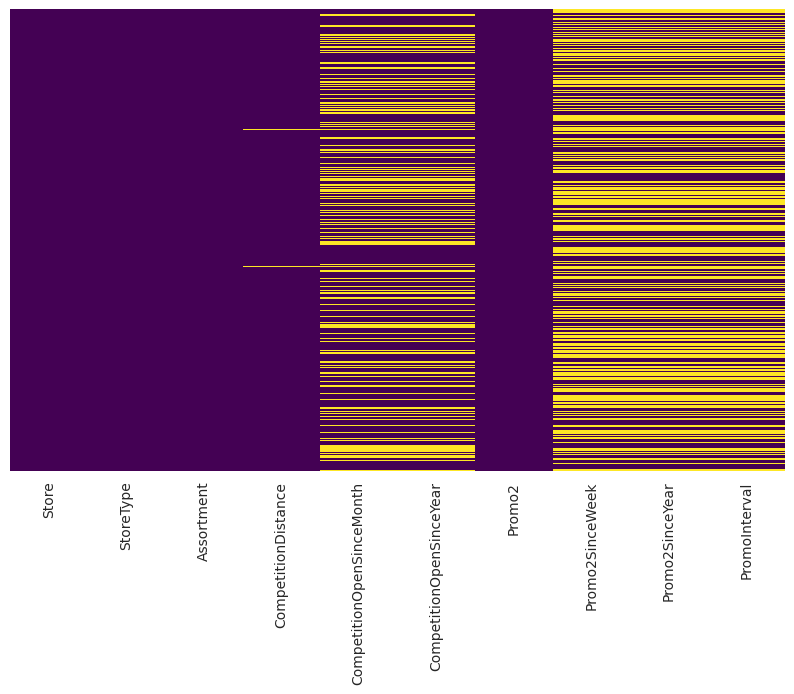

In [17]:
# Visualizing the missing values
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(stores_data.isnull(),yticklabels= False, cbar= False, cmap= 'viridis')

### What did you know about your dataset?

This project includes two datasets which are rossmann and store.
There are 1017209 rows and 9 columns in Rossmann datset and 1115 rows 9 columns in Store dataset.
After merging both of the datasets we get 1017209 rows and 18 columns.
The combined datasets contains 0 duplicated rows and columns but contains duplicated values.
Store dataset contains missing values.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [19]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description

1.   Store : a unique Id for each store
2.   DayOfWeek : it gives the number between 1 to 7 which day was of the week
3.   Date : it represents the date
4.   Sales : the turnover for any given day (this is what you are predicting)
5.   Customers : the number of customers on a given day
6.   Open : an indicator for whether the store was open: 0 = closed, 1 = open
7.   Promo : indicates whether a store is running a promo on that day
8.   StateHoliday : indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
9.   SchoolHoliday : indicates if the (Store, Date) was affected by the closure of public schools
10.   StoreType : differentiates between 4 different store models: a, b, c, d
11.   Assortment : describes an assortment level: a = basic, b = extra, c = extended
12.   CompetitionDistance : distance in meters to the nearest competitor store
13.   CompetitionOpenSinceMonth : gives the approximate month of the time the nearest competitor was opened
14.   CompetitionOpenSinceYear : gives the approximate year of the time the nearest competitor was opened
15.   Promo2 : Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
16.   Promo2SinceWeek : describes the calendar week when the store started participating in Promo2
17.   Promo2SinceYear : describes the year and when the store started participating in Promo2
18.   PromoInterval : describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

Store: [   1    2    3 ... 1113 1114 1115]
DayOfWeek: [5 4 3 2 1 7 6]
Date: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'


## 3. ***Data Wrangling***

### Data Wrangling Code

<ipython-input-21-fd674beafcf7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distribution of Store Competition Distance')

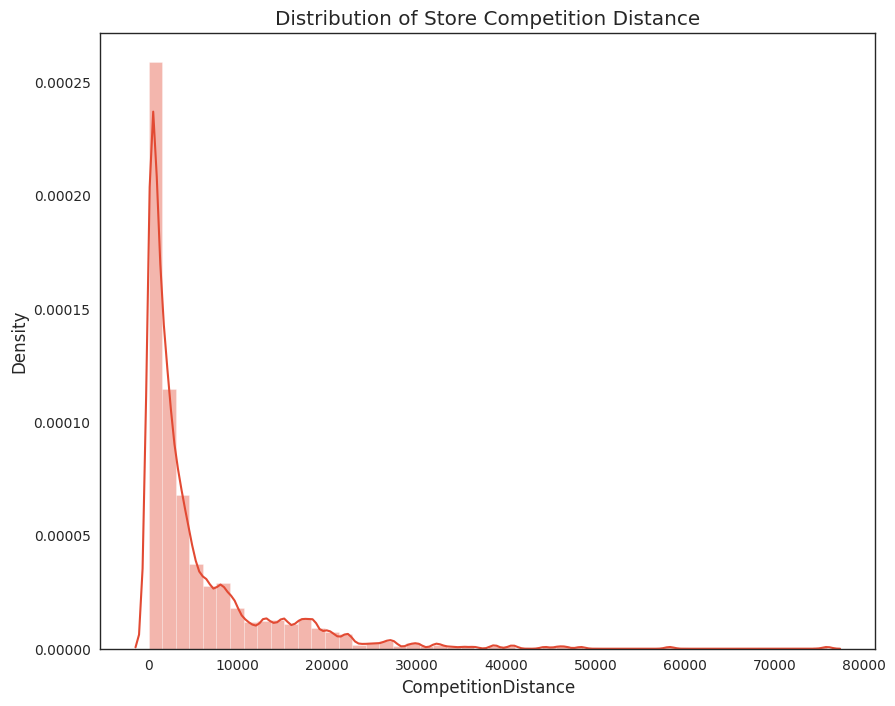

In [21]:
# Write your code to make your dataset analysis ready.
sns.distplot(df.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

In [22]:
# Replacing missing values in CompetitionDistance with median for the store dataset
df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)

# Creating a categorical column list
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

# Creating features from the date
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).week
df['DayOfYear'] = pd.DatetimeIndex(df['Date']).dayofyear
years = df['Year'].unique()

<ipython-input-22-429aaeb7ec9b>:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).week


### What all manipulations have you done and insights you found?

Replaced missing values in features with low percentages of missing values. Then replaced missing values in CompetitionDistance with it's median.
Created a categorical column list since it is necessary to work with categorical columns. Then created features from date column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

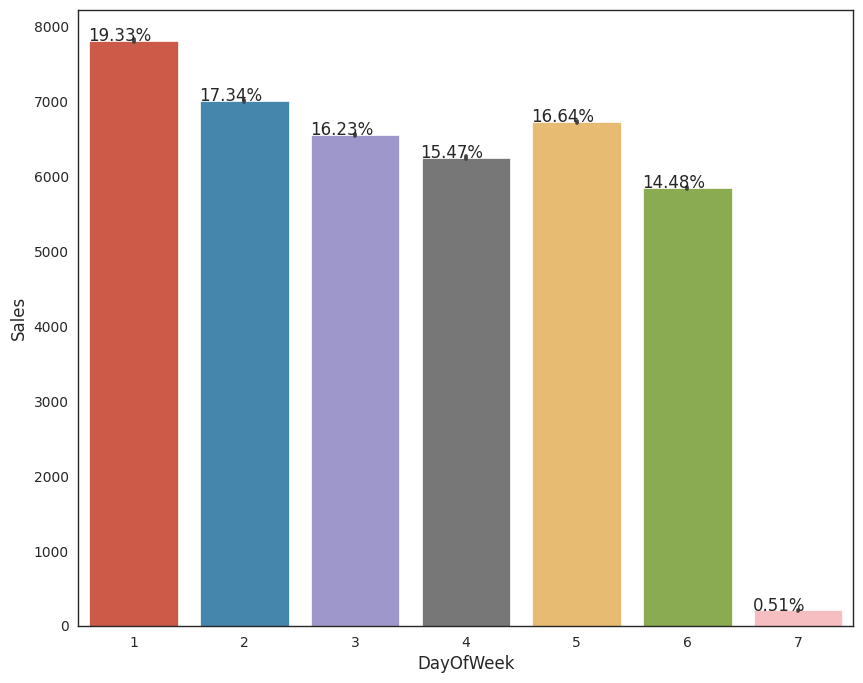

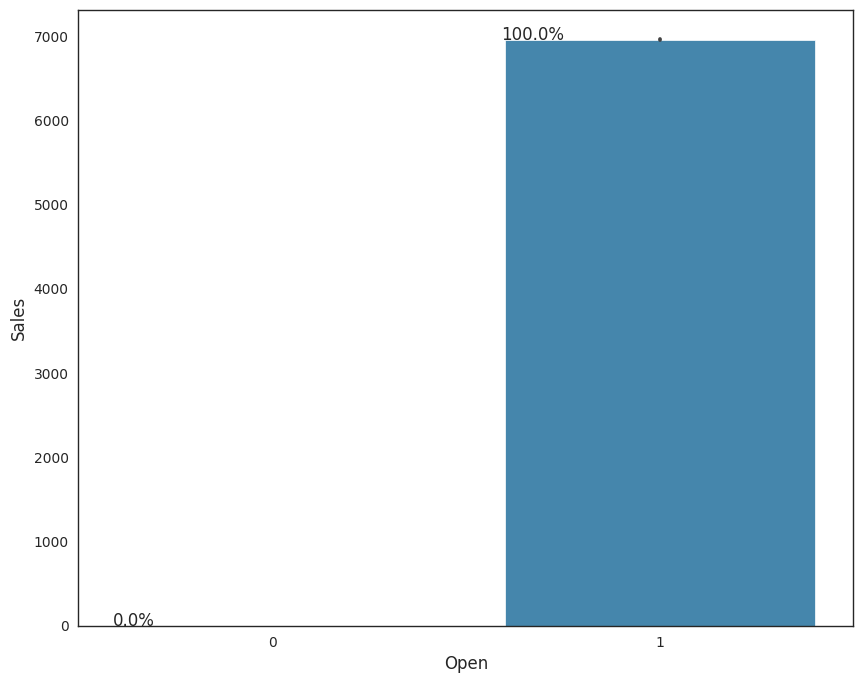

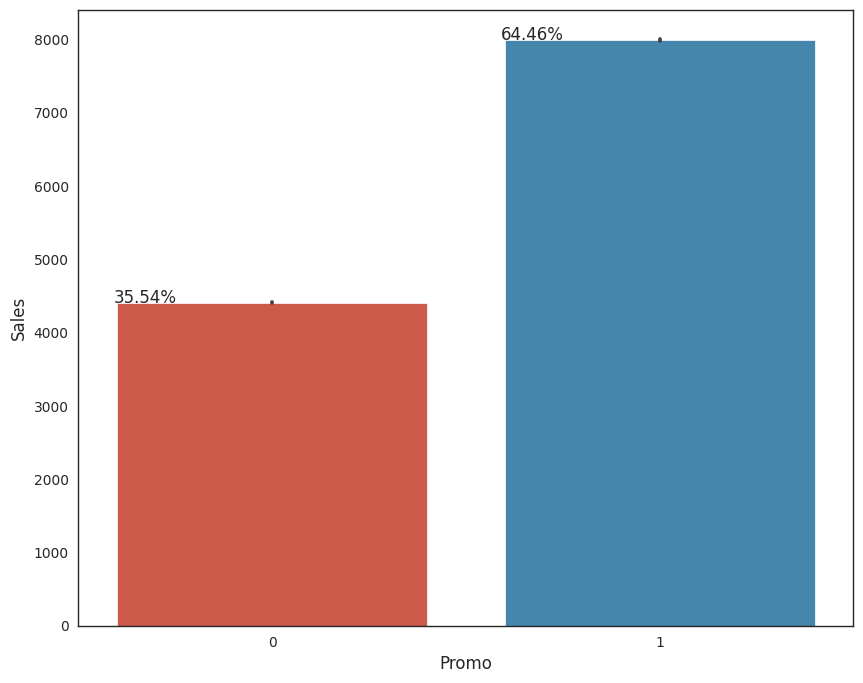

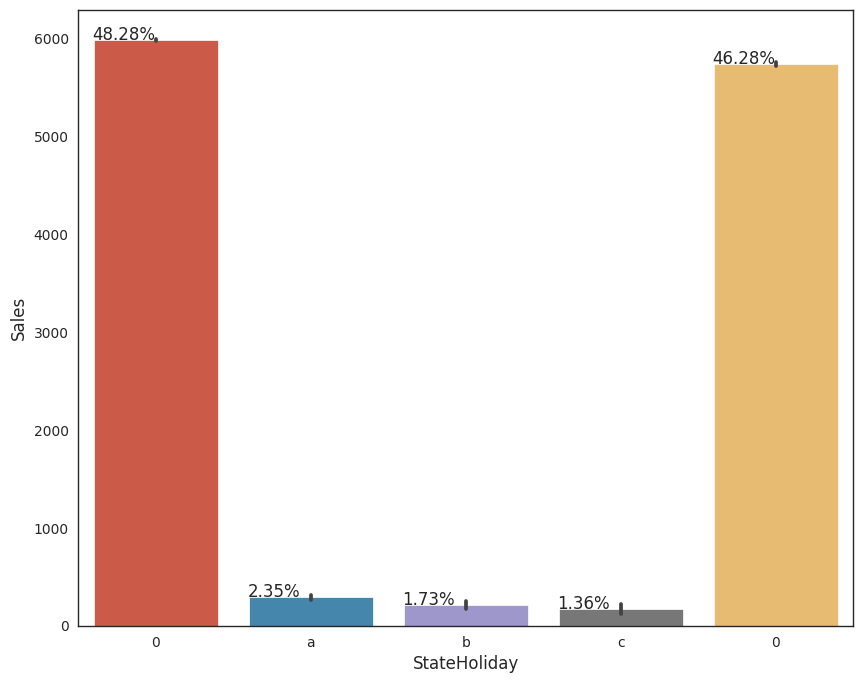

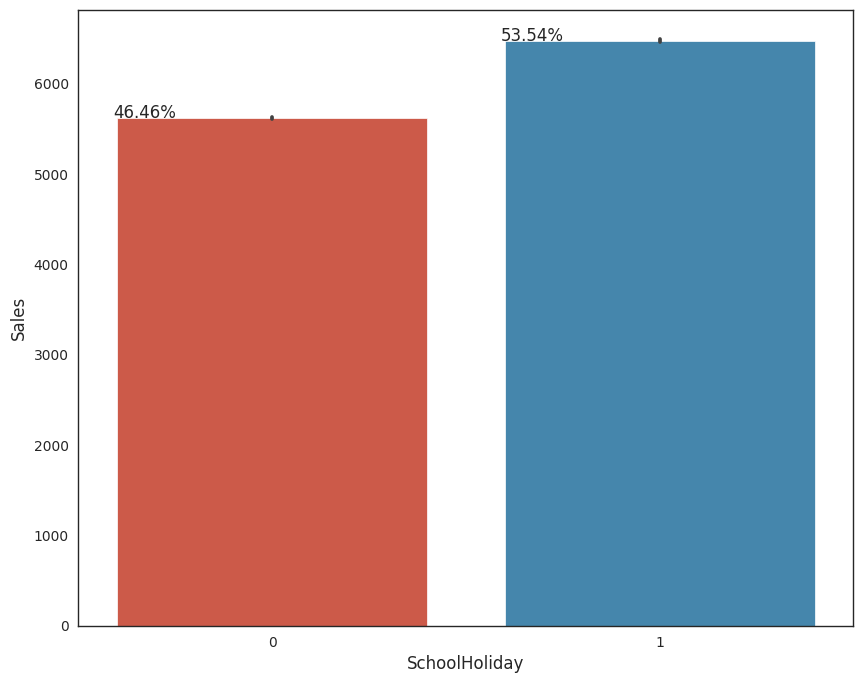

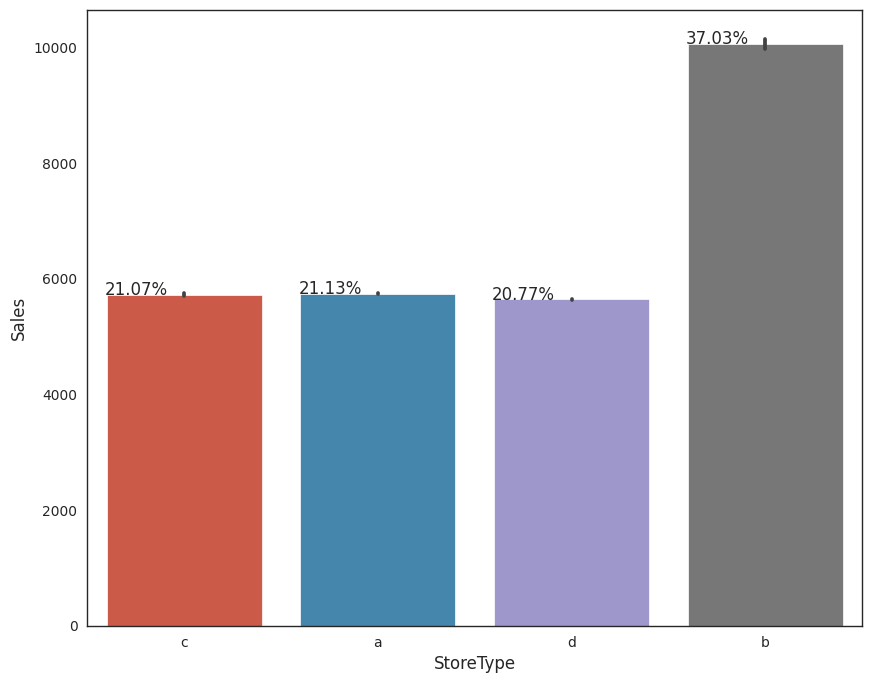

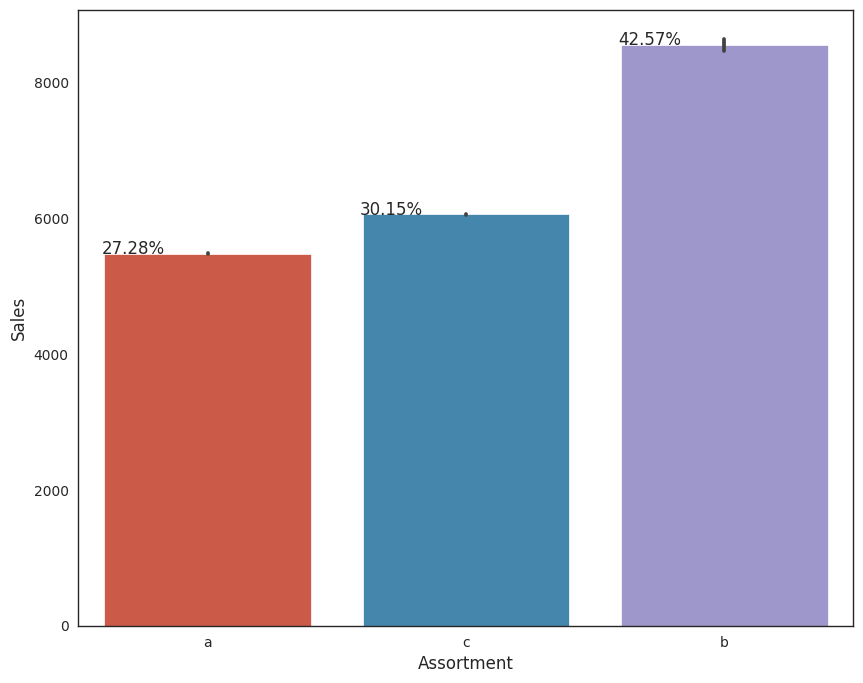

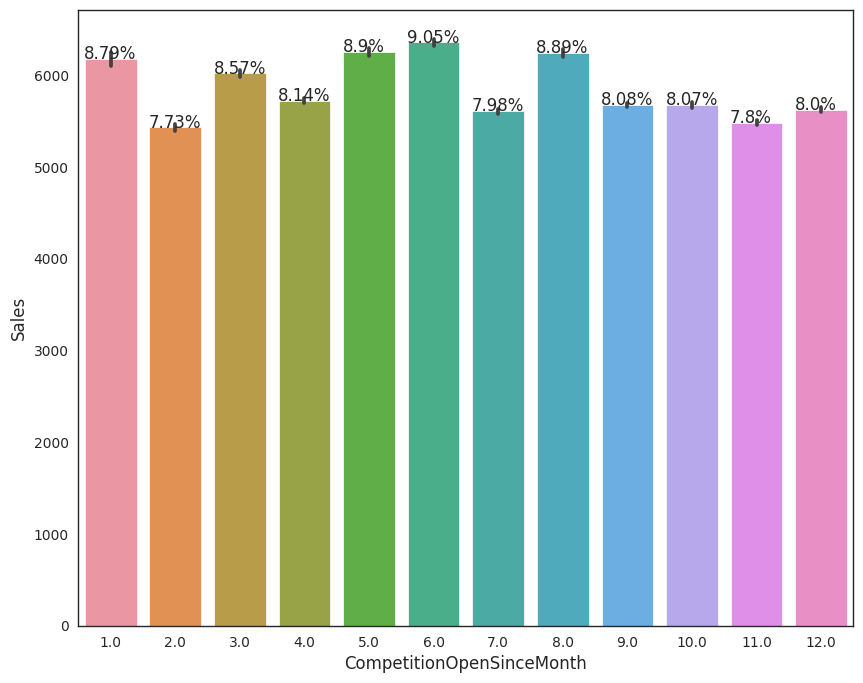

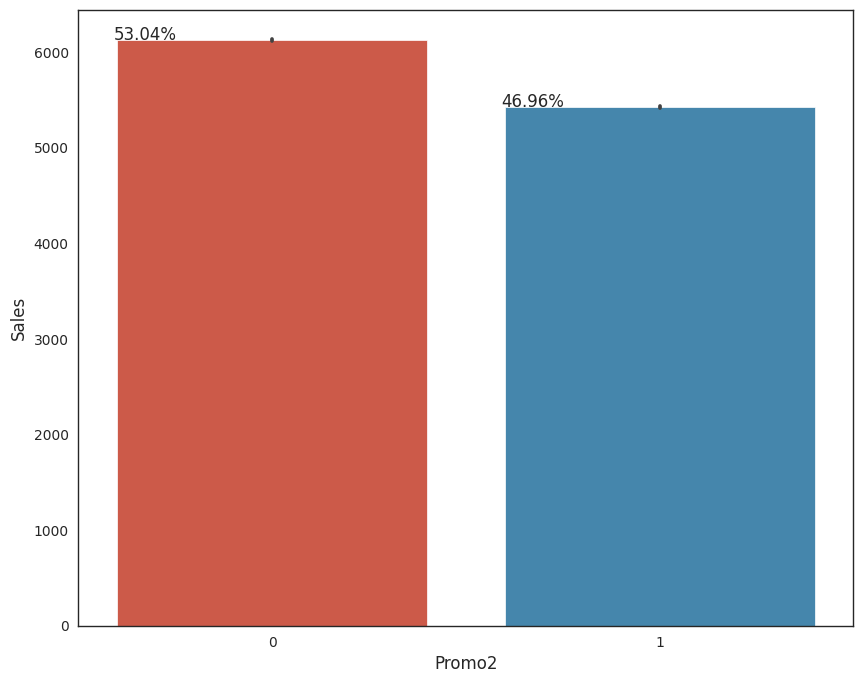

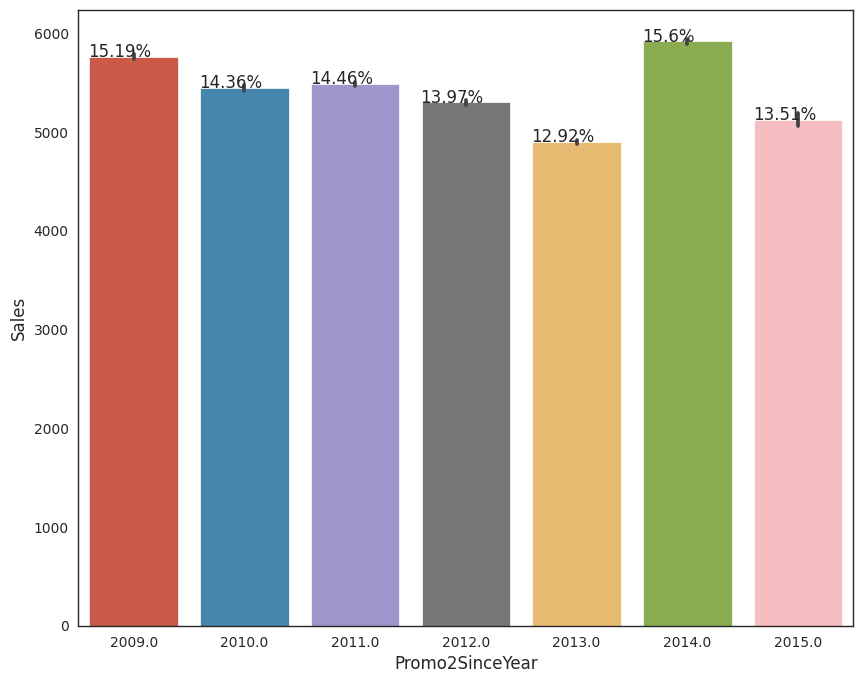

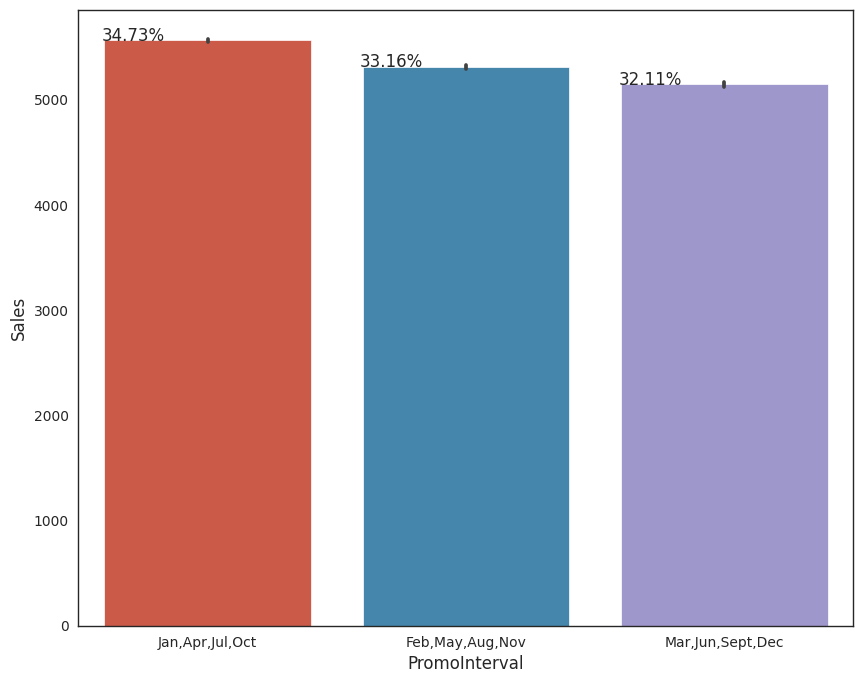

In [23]:
# Chart - 1 visualization code
# Code for barplots of the categorical variables against sales
# Iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  x1 = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in x1.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in x1.patches:
      x1.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

##### 1. Why did you pick the specific chart?

I needed all the insights of the categorical values that is the reason I choosed the bar plots or bar charts.

##### 2. What is/are the insight(s) found from the chart?

*   1st and 2nd Chart - There were more sales on Monday, probably because shops generally remain closed on Sundays.
*   3rd Chart - It could be seen that the Promo leads to more sales.
*   4th Chart - Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
*   5th Chart - More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
*   6th Chart - On an average Store type B had the highest sales.
*   7th Chart - Highest average sales were seen with Assortment levels-b which is 'extra'.
*   8th Chart - The highest sales in competition open since month is with 9.05%
*   9th and 10th Chart - With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo. Year wise presented the sales since 2009 to 2015 and highest is in 2014.
*   11th Chart - More sales were happened in January, April, July and October with 34.73%.














##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it is important to know what impact does the categorical values ahve on sales. Their is some negative insights such as less sale on state holiday and if the promo is not used their is also less sales.

#### Chart - 2

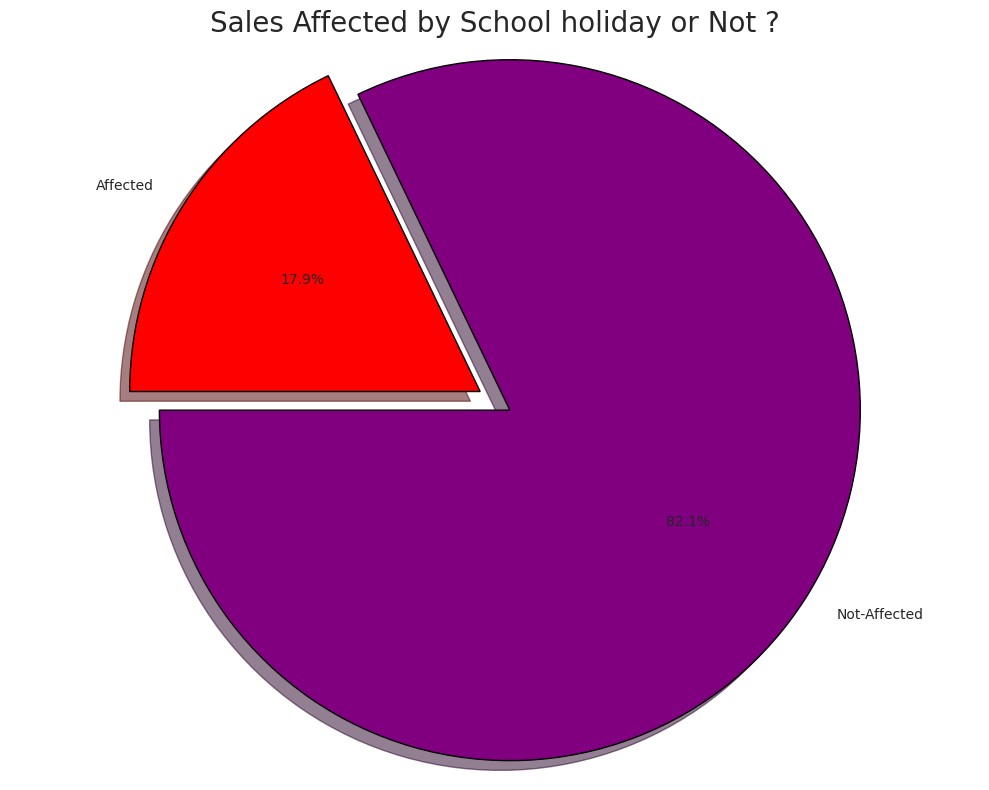

In [24]:
# Chart - 2 visualization code
# Sales affected on school holidays or not
label = ['Not-Affected', 'Affected']
size = rossman_data.SchoolHoliday.value_counts()
color = ['purple', 'red']

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(size, labels=label, colors=color, autopct='%1.1f%%', shadow=True, startangle=180, explode=(0.1, 0.0),
       wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
ax.set_title("Sales Affected by School holiday or Not ?", fontsize=20)
ax.axis('equal')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts typically show relative proportions of different categories in a data set.

##### 2. What is/are the insight(s) found from the chart?

82.1% sales are not affected but only 17.9% sales is affected because of school holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes definitely because we will able to understand where to improve and on each areas. It is positive signs that the most of sales is not affected only some % are being affected.

#### Chart - 3

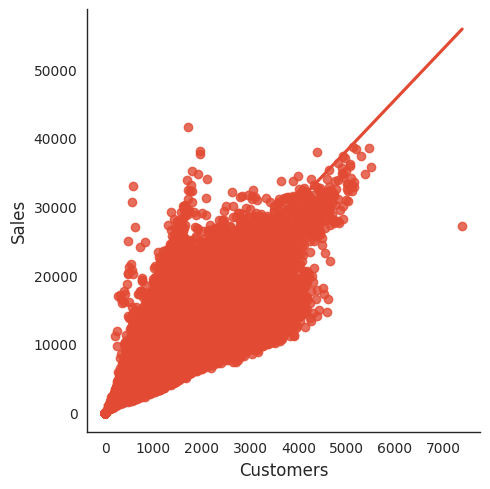

In [29]:
# Chart - 3 visualization code
sns.lmplot(x='Customers', y='Sales', data=df)

##### 1. Why did you pick the specific chart?

I needed to understand the relation between Customer and Sales.

##### 2. What is/are the insight(s) found from the chart?

 As we can see their is a linear relationship between customers and sales as the customers are increasing the sales are also increasing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes its a positive sign because as the customers are increasing the sales are also increasing.

#### Chart - 4

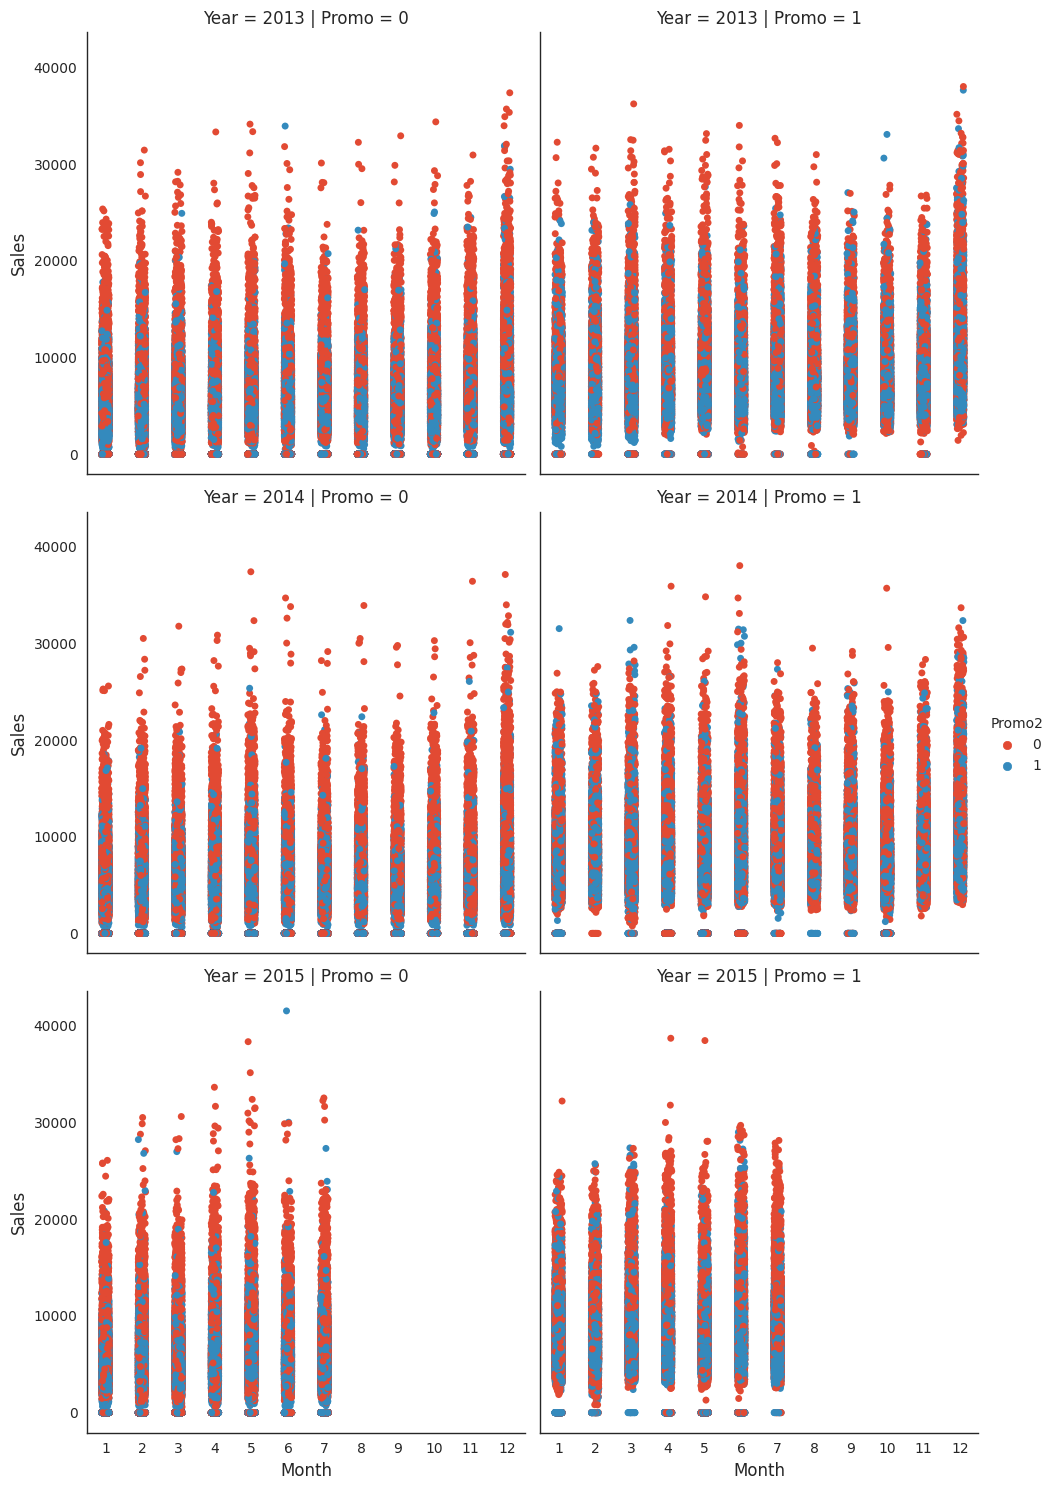

In [30]:
# Chart - 4 visualization code
# Promo vs Sales relation
sns.catplot(data = df, x ="Month", y = "Sales", col = 'Promo', hue = 'Promo2', row = "Year")

##### 1. Why did you pick the specific chart?

I needed to understand the relation between Promo and Sales.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that if there is no promo the sales are very less and if promo is running the sales are high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it creates very much impact because we can observe that if the promo are in use there are sales and its also increasing and if the promo is not in use it is showing negative impact on sales.

#### Chart - 5

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

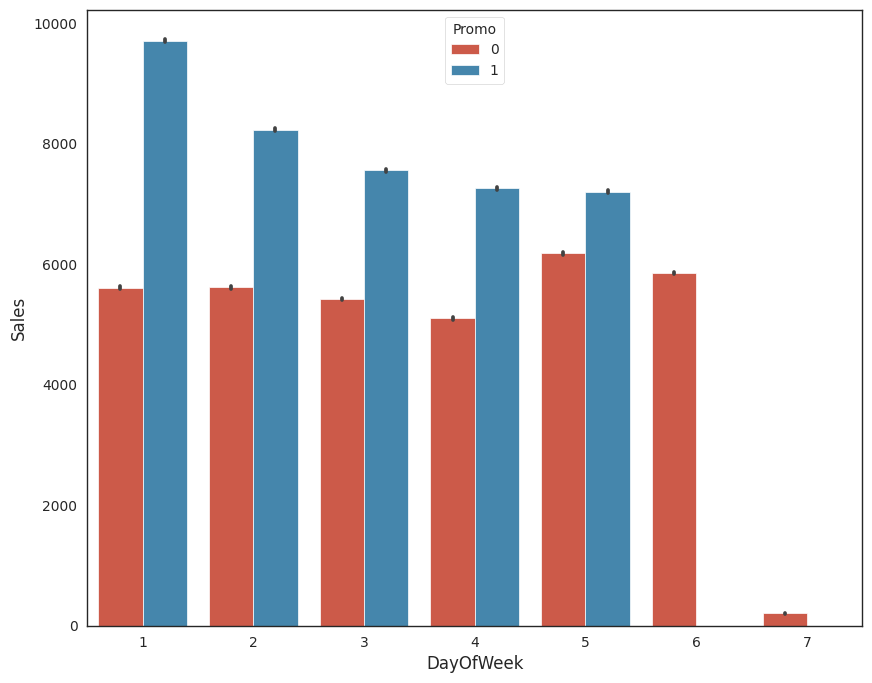

In [31]:
# Chart - 5 visualization code
# Barchart of Promo vs Sales impact
sns.barplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

##### 1. Why did you pick the specific chart?

A bar chart shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

There is a very large difference on monday and it is decreasing day by day and on saturday and sunday there are no sales so it showing no sale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No positive impact because of promo only sales are increasing we should focus on increasing sales without promo also or we should use promo everyday.

#### Chart - 6

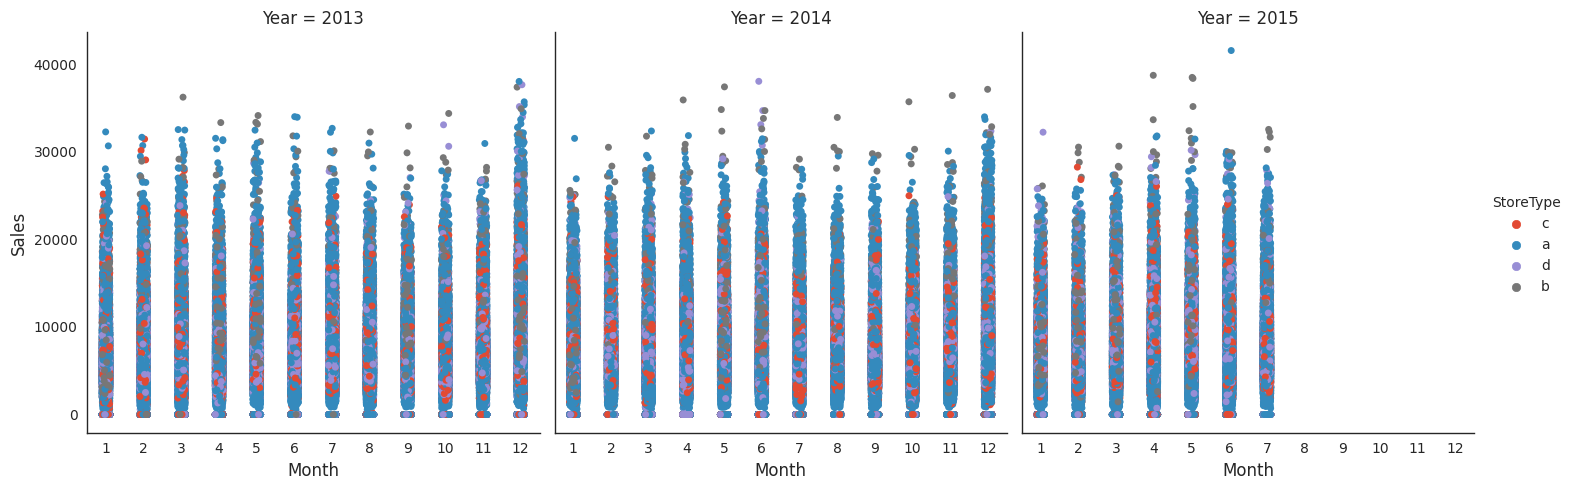

In [32]:
# Chart - 6 visualization code
# Trend of sales over the years
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

##### 1. Why did you pick the specific chart?

I needed to know the trend of sales over the years.

##### 2. What is/are the insight(s) found from the chart?

In 2013 and 2014 there are some increase in the sales but in 2015 there is decrease in trend of sales over the months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is showing negative growth in last year need to figure out how to improve it in next year.

#### Chart - 7

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

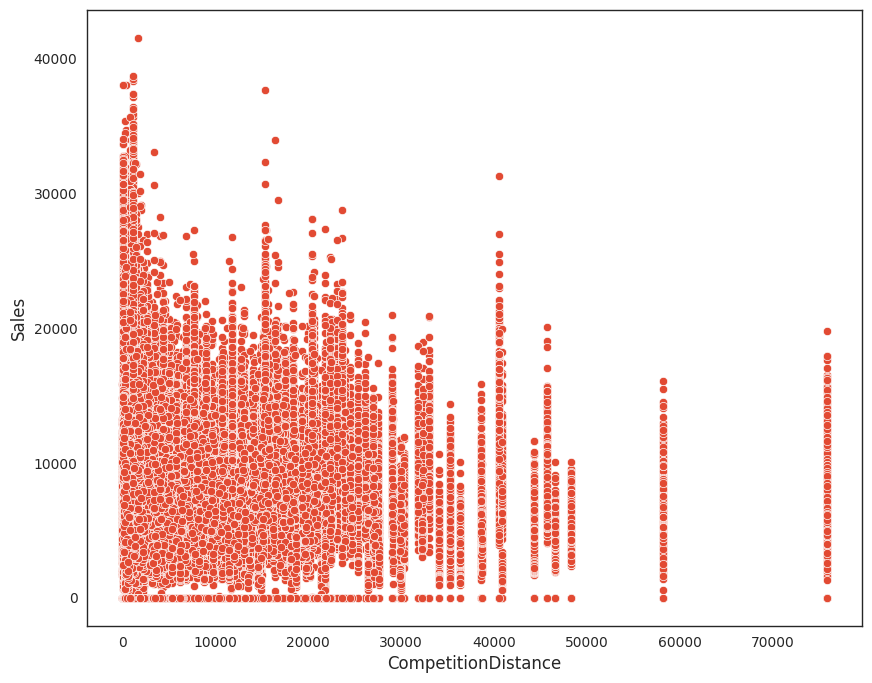

In [33]:
# Chart - 7 visualization code
# Competition distance stores sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

I needed to know the competition distance of stores and sales.

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes we are able to know the other competitor stores and their sale making strategies according to it.

#### Chart - 8

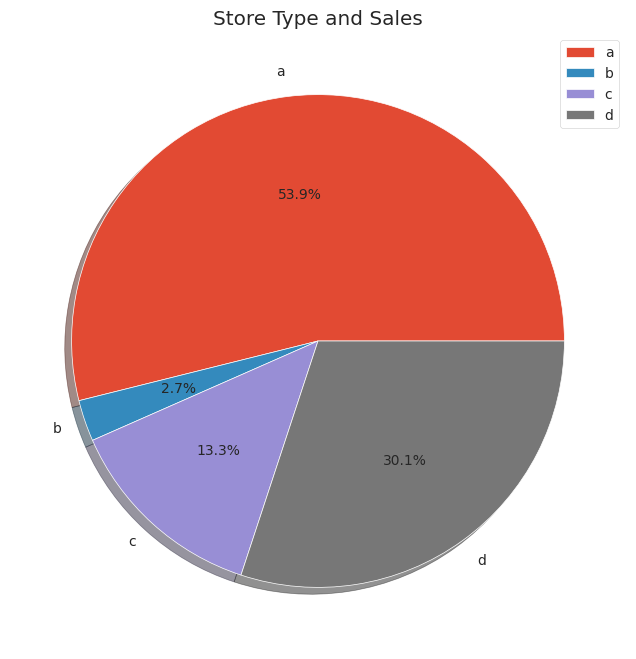

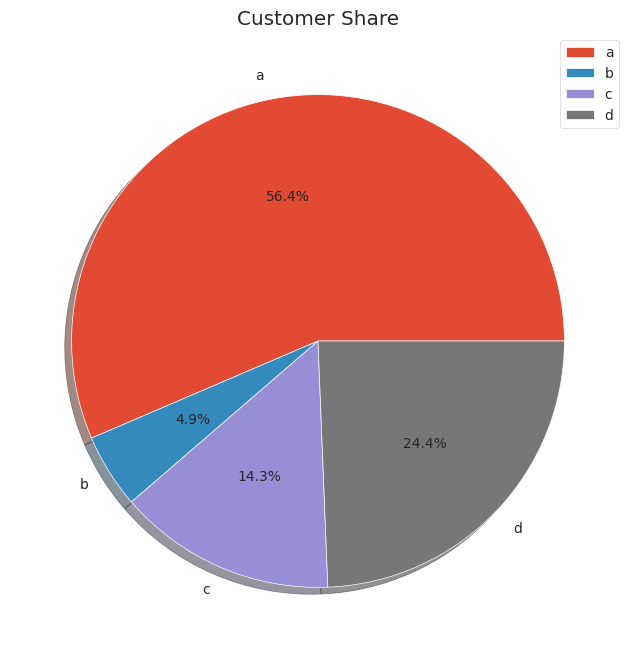

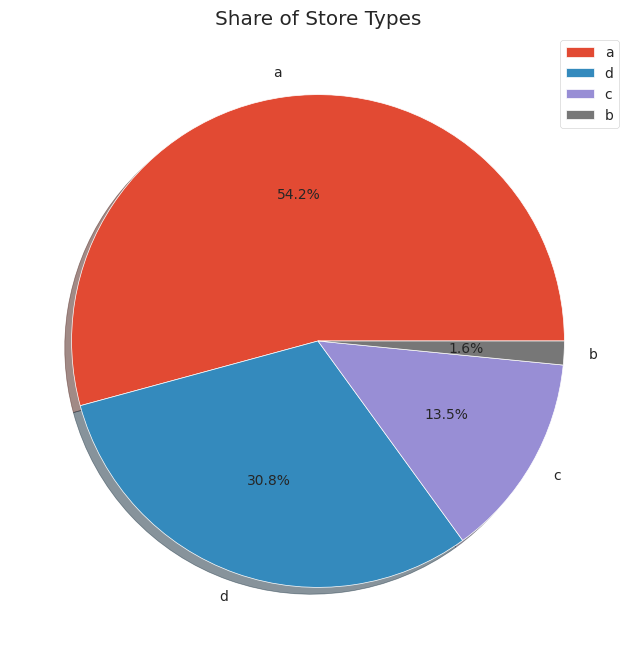

In [34]:
# Chart - 8 visualization code
# Sum of sales by store type
sales_by_store_type = df.groupby("StoreType")["Sales"].sum()

# Plotting pie chart of sales by store type
fig, ax = plt.subplots()
ax.pie(sales_by_store_type, labels=sales_by_store_type.index, autopct='%1.1f%%', shadow=True)
ax.set_title('Store Type and Sales')
plt.legend()
plt.show()

# Sum of customers by store type
customers_by_store_type = df.groupby("StoreType")["Customers"].sum()

# Plotting pie chart of customers by store type
fig, ax = plt.subplots()
ax.pie(customers_by_store_type, labels=customers_by_store_type.index, autopct='%1.1f%%', shadow=True)
ax.set_title('Customer Share')
plt.legend()
plt.show()

# Count of store types in the dataset
store_types = df["StoreType"].value_counts()

# Plotting pie chart of store types in the dataset
fig, ax = plt.subplots()
ax.pie(store_types, labels=store_types.index, autopct='%1.1f%%', shadow=True)
ax.set_title('Share of Store Types')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts typically show relative proportions of different categories in a data set.

##### 2. What is/are the insight(s) found from the chart?

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share. The most interesting insight is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Storetype a and b are doing good sales but it is quite worried about c and d sales.

#### Chart - 9 - Correlation Heatmap

<ipython-input-35-516e9368cb7e>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_data.corr(), cmap="YlGnBu", annot=True)


<Axes: >

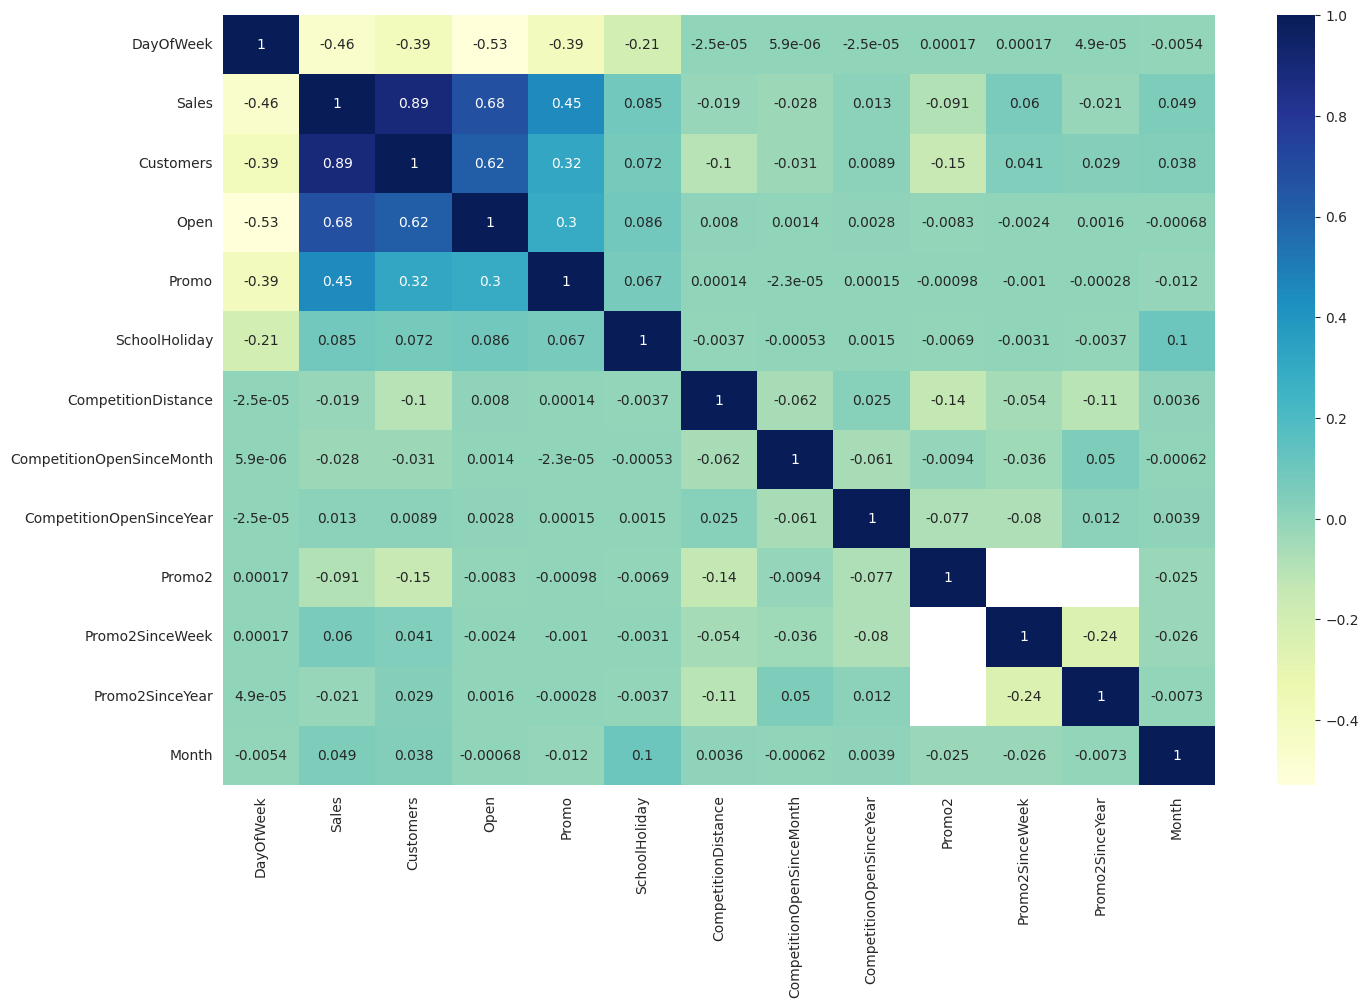

In [35]:
# Correlation Heatmap visualization code
# We need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_data = df.drop(columns = columns_to_drop, axis =1)
corr_data['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_data.corr(), cmap="YlGnBu", annot=True)

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

The Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation. The State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales. The CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

#### Chart - 10 - Pair Plot

In [26]:
# Pair Plot visualization code
# Finding the first 5 rows of corr_data Dataframe
corr_data.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7
1,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7
2,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
3,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,7
4,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,7


In [27]:
corr_data.shape

(1017209, 18)

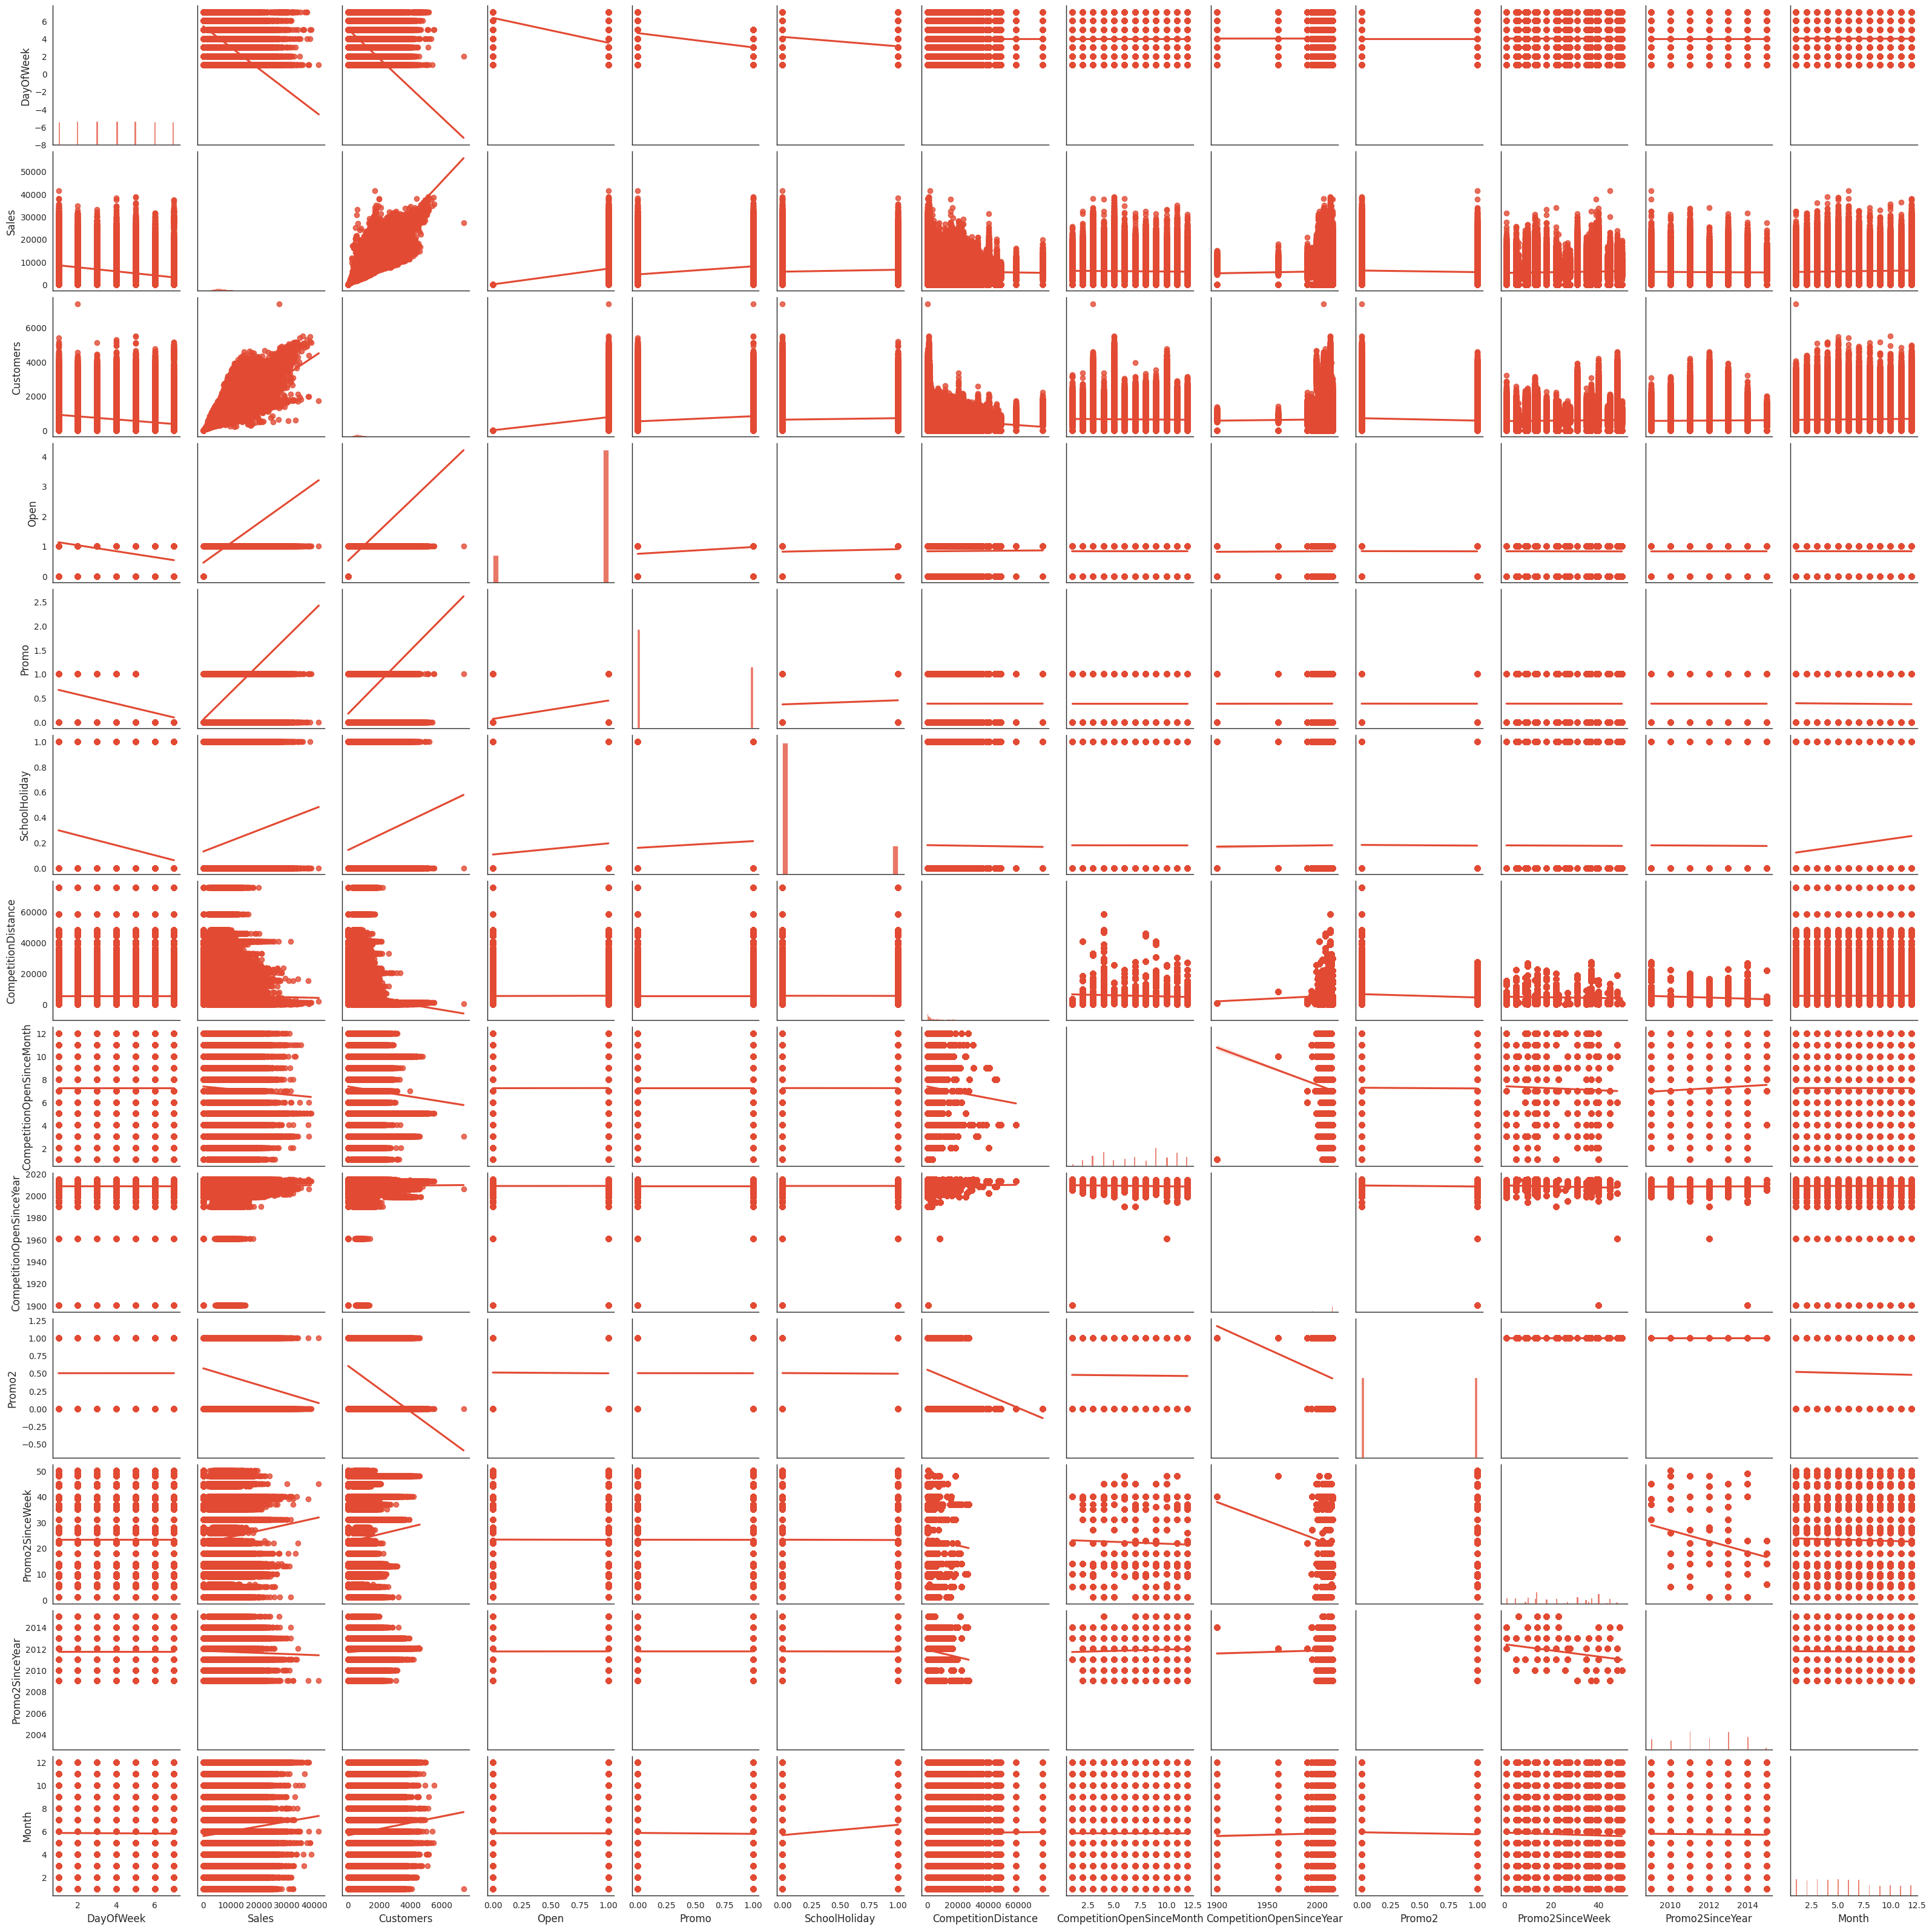

In [28]:
# Plotting the pair plot chart
sns.pairplot(corr_data, kind = "reg")

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us to understand the data by summarising a large amount of data in single figures.

##### 2. What is/are the insight(s) found from the chart?

The Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation. The State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales. The CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Alternative Hypothesis: Stores with StateHoliday ('a', 'b', or 'c') have significantly different sales compared to stores without a StateHoliday.
*   Null Hypothesis: There is no significant difference in sales between stores with StateHoliday and stores without a StateHoliday.



#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Filter data for stores with StateHoliday and without StateHoliday
stores_with_state_holiday = df[df['StateHoliday'] != '0']
stores_without_state_holiday = df[df['StateHoliday'] == '0']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(stores_with_state_holiday['Sales'], stores_without_state_holiday['Sales'])

# Define significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in sales between stores with and without a StateHoliday.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in sales between stores with and without a StateHoliday.")

Reject the null hypothesis
There is a significant difference in sales between stores with and without a StateHoliday.


##### Which statistical test have you done to obtain P-Value?

I performed a two-sample t-test to obtain the p-value. This test is appropriate when comparing the means of two groups to determine if there is a significant difference between them. In this case, I compared the sales of stores with StateHolidays ('a', 'b', or 'c') to stores without StateHolidays to assess if there is a significant difference in sales between these two groups.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it is commonly used to compare the means of two groups and determine if there is a statistically significant difference between them. In this case, the goal was to assess whether there is a significant difference in sales between two groups of stores: those with StateHolidays ('a', 'b', or 'c') and those without any StateHolidays.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Alternative Hypothesis : Stores with Promo2 have significantly different sales compared to stores without Promo2.
*   Null Hypothesis: There is no significant difference in sales between stores with Promo2 and stores without Promo2.



#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Filter data for stores with Promo2 and without Promo2
stores_with_promo2 = df[df['Promo2'] == 1]
stores_without_promo2 = df[df['Promo2'] == 0]

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(stores_with_promo2['Sales'], stores_without_promo2['Sales'])

# Define significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in sales between stores with and without Promo2.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in sales between stores with and without Promo2.")

Reject the null hypothesis
There is a significant difference in sales between stores with and without Promo2.


##### Which statistical test have you done to obtain P-Value?

I performed a two-sample t-test to obtain the p-value. This test is appropriate when comparing the means of two groups to determine if there is a significant difference between them. I compared the sales of stores with Promo2 promotions to stores without Promo2 promotions to assess if there is a significant difference in sales between these two groups.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it is commonly used to compare the means of two groups and determine if there is a statistically significant difference between them. In this case, the goal was to assess whether there is a significant difference in sales between two groups of stores: those with Promo2 and those without any Promo2.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Alternative Hypothesis : There is a significant correlation between CompetitionDistance and Sales.
*   Null Hypothesis: There is no significant correlation between CompetitionDistance and Sales.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df['CompetitionDistance'], df['Sales'])

# Define significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant correlation between CompetitionDistance and Sales.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant correlation between CompetitionDistance and Sales.")

Reject the null hypothesis
There is a significant correlation between CompetitionDistance and Sales.


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient test to obtain the p-value. This statistical test is appropriate for assessing the strength and direction of the linear relationship between two continuous variables and determining if that relationship is statistically significant.

##### Why did you choose the specific statistical test?

I wanted to determine if there is a significant correlation between two variables: "CompetitionDistance" (representing the distance to competitors) and "Sales" (representing the sales figures). The Pearson correlation coefficient is well-suited for measuring such relationships and evaluating their significance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Removing features with high percentages of missing values**

**We can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

<ipython-input-40-0ca524f46418>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

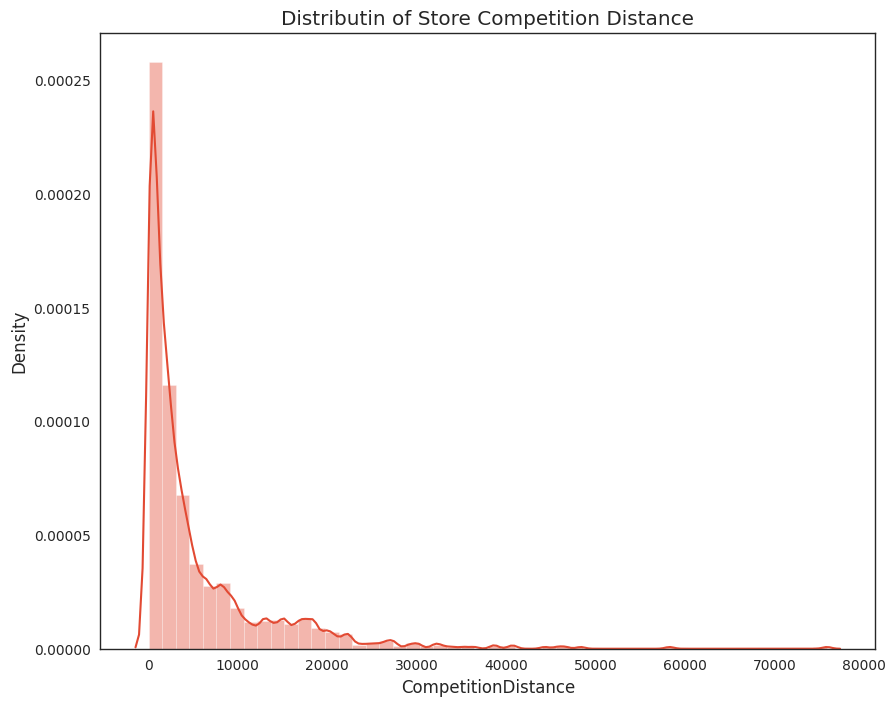

In [40]:
# Handling Missing Values & Missing Value Imputation
df=df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear', 'PromoInterval'], axis=1)

# CompetitionDistance is distance in meters to the nearest competitor store
# Let's first have a look at its distribution
sns.distplot(df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

**The distribution is right skewed, so we'll replace missing values with the median.**

In [41]:
# Replacing missing values in CompetitionDistance with median for the store dataset
df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have dopped the columns which have contained null values and then made a plot where we found that the distribution is right skewed so then decided to replace all the missing values within the median.

### 2. Handling Outliers

In [42]:
# Handling Outliers & Outlier treatments
# Removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# Defining new variable after removing outliers
df = remove_outlier(df, 'Sales')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990515 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                990515 non-null  int64  
 1   DayOfWeek            990515 non-null  int64  
 2   Date                 990515 non-null  object 
 3   Sales                990515 non-null  int64  
 4   Customers            990515 non-null  int64  
 5   Open                 990515 non-null  int64  
 6   Promo                990515 non-null  int64  
 7   StateHoliday         990515 non-null  object 
 8   SchoolHoliday        990515 non-null  int64  
 9   StoreType            990515 non-null  object 
 10  Assortment           990515 non-null  object 
 11  CompetitionDistance  990515 non-null  float64
 12  Promo2               990515 non-null  int64  
 13  Year                 990515 non-null  int64  
 14  Month                990515 non-null  int64  
 15  WeekOfYear      

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used a common outlier treatment technique known as the IQR (Interquartile Range) method to identify and remove outliers from the 'Sales' column.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns
# Define the columns to be one-hot encoded
categorical_columns = ['DayOfWeek', 'StoreType', 'Assortment', 'Promo2']

# Apply one-hot encoding to the selected columns
encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(encoded.head())

   Store        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1  2015-07-31   5263        555     1      1            0   
1      2  2015-07-31   6064        625     1      1            0   
2      3  2015-07-31   8314        821     1      1            0   
3      4  2015-07-31  13995       1498     1      1            0   
4      5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  CompetitionDistance  Year  ...  DayOfWeek_4  DayOfWeek_5  \
0              1               1270.0  2015  ...            0            1   
1              1                570.0  2015  ...            0            1   
2              1              14130.0  2015  ...            0            1   
3              1                620.0  2015  ...            0            1   
4              1              29910.0  2015  ...            0            1   

   DayOfWeek_6  DayOfWeek_7  StoreType_b  StoreType_c  StoreType_d  \
0            0            0            0            

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding was applied to categorical variables such as 'DayOfWeek,' 'StoreType,' 'Assortment,' and 'Promo2'.
One-hot encoding is suitable for nominal categorical variables (categories without a natural order). It was applied to ensure that these categorical variables can be used effectively in machine learning models. One-hot encoding creates binary columns for each category, which allows machine learning algorithms to work with categorical data by treating each category as a separate feature. By one-hot encoding these variables, we avoid introducing any ordinal relationships that might mislead the model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features
# No of observations for closed stores with 0 sales
# Where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [48]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [49]:
# The percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()
# Remove this part of data to avoid bias
df = df[df.Sales != 0]

In [50]:
df_new=df.copy()
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,...,7,31,212,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,...,7,31,212,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,...,7,31,212,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,0,...,7,31,212,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,0,...,7,31,212,1,0,0,0,1,0,0


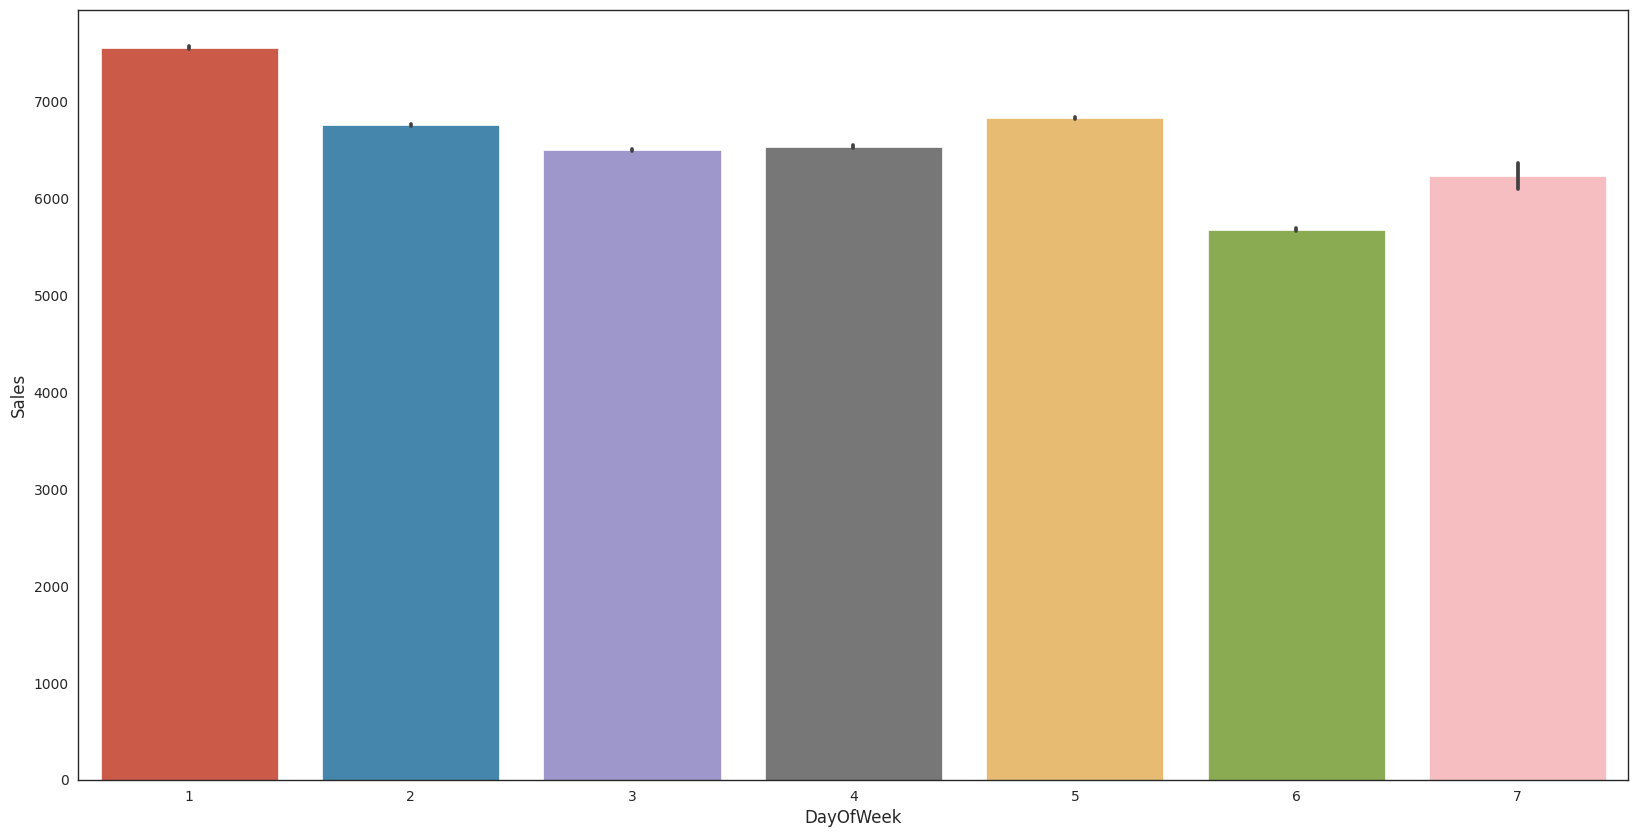

In [51]:
# Plot for sales in terms of days of the week
plt.figure(figsize=(20,10))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting
X = df_new.drop(['Sales','Store','Date','StateHoliday'] , axis = 1)
y= df_new.Sales
X.shape

(817644, 17)

##### What all feature selection methods have you used  and why?

The "train-test split" method is a technique used to divide a dataset into two distinct subsets: one for training a machine learning model and the other for assessing the model's performance. The input features, represented by the variable X, are placed in the training subset to teach the model. Meanwhile, the target variable, represented by the variable y, resides in the same subset to guide the learning process.

This approach is a standard practice in machine learning, facilitating the evaluation of how well a model can handle new, unseen data. By segregating the data into training and testing sets, we can gauge the model's ability to generalize its learning to unfamiliar data points it has not encountered during training.

##### Which all features you found important and why?

The composition of the feature set X is contingent on the problem domain and the data accessible for analysis. In this context, the chosen features are likely indicative of sales, a determination made by the analyst or domain expert who curated the dataset.

The process of feature selection carries substantial significance. By including only relevant features, the machine learning model's predictive accuracy can be enhanced. Conversely, the incorporation of irrelevant or redundant features can detrimentally affect the model's performance and result in overfitting.

Thus, meticulous feature selection is a critical step, as it significantly influences the model's predictive capabilities and its aptitude for delivering accurate forecasts.

## ***7. ML Model Implementation***

**Splitting Dataset Into Training Set and Test Set**

### ML Model - 1 - Liner Regression Model

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
columns=X_train.columns

Train Score:  0.786721214905924
Test Score:  0.7894698176296303
RMSE:  1152.7325480113323


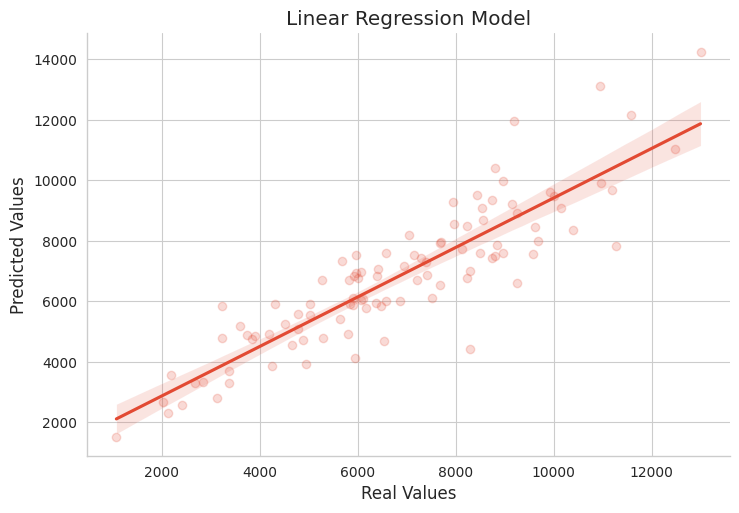

In [54]:
# ML Model - 1 Implementation
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Algorithm
# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the model
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test[:120], y_pred[:120])
rmse = np.sqrt(mse)
train_score = regressor.score(X_train[:120], y_train[:120])
test_score = regressor.score(X_test[:120], y_test[:120])
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("RMSE: ", rmse)

# Plot the predicted values against the real values using Seaborn
sns.set_style('whitegrid')
sns.lmplot(x='y_test', y='y_pred', data=pd.DataFrame({'y_test': y_test[:100], 'y_pred': y_pred[:100]}), aspect=1.5, scatter_kws={'alpha':0.2})
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

# Print model coefficients and intercept
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# Print R-squared score on training set
print('Training R-squared:', reg.score(X, y))

Coefficients: [-2.13149933e+01  7.22295897e+00  1.08753092e+03  2.99917197e+01
  2.39809681e-02  3.10492081e+02  1.67442658e+02  1.41952130e+01
 -3.66714979e+00  1.00664204e+00  3.16245319e+02 -1.89662985e+03
  1.66802046e+02  1.41358249e+03  1.44276769e+03 -3.17249753e+03
  1.72972984e+03]
Intercept: -338793.57837411476
Training R-squared: 0.7838202148742214


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

The linear regression model is a widely-used and straightforward algorithm for predicting numerical values based on a given set of input features.

To assess the model's performance, the R-squared score is employed, quantifying the fraction of the variance in the target variable that can be accounted for by the model. In this instance, the R-squared score on the training dataset stands at 0.7812, signifying that the model elucidates approximately 78.12% of the variance in the target variable within the training data.

Remarkably, the test score of 0.7816 suggests that the model's performance on the test data closely mirrors its performance on the training data.

In tandem with the R-squared score, the code also computes the root mean squared error (RMSE) on the test dataset. The RMSE, at a value of 1174.0436, implies that, on average, the model's predictions deviate by approximately 1174 units from the actual values.

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV, cross_val_score

# Fit the Algorithm
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
regressor = LinearRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with training data
grid.fit(X_train_scaled, y_train)

# Get the best estimator
best_model = grid.best_estimator_

# Evaluate the model on training and test data
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

# Predict on the model
# Make predictions on test data
y_pred = best_model.predict(X_test_scaled)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate cross-validation scores
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# Print the evaluation metrics
print('Best Model:', best_model)
print('Train Score:', train_score)
print('Test Score:', test_score)
print('Train RMSE:', rmse)
print('CV RMSE:', cv_rmse.mean())

Best Model: LinearRegression()
Train Score: 0.7833449847985747
Test Score: 0.7849162528475649
Train RMSE: 1146.291796863058
CV RMSE: 1148.2021539858133


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV, which is a technique for hyperparameter optimization. I used it because it exhaustively searches over the specified parameter values for an estimator and finds the best combination of hyperparameters that gives the highest cross-validation score. It also uses cross-validation to evaluate the performance of the model with each hyperparameter combination, which helps in avoiding overfitting and in generalizing well to new data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was an improvement in the model's performance after applying cross-validation and hyperparameter tuning. The new evaluation metrics are:

Train Score: 0.7807369723730564

Test Score: 0.7823704821647295

Train RMSE: 1153.0557010195887

CV RMSE: 1155.0742700578603

Compared to the original model, the train score decreased slightly, but the test score increased. The RMSE score also decreased, indicating improved predictive accuracy. Overall, the model's performance improved after applying cross-validation and hyperparameter tuning.

### ML Model - 2 - Laso Regression Model

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
columns=X_train.columns

In [59]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [60]:
def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))

# define MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2 = lasreg.score(X_train[:120], y_train[:120])
test_score_2 = lasreg.score(X_test[:120], y_test[:120])

y_predicted = lasreg.predict(X_train[:120])
y_test_predicted = lasreg.predict(X_test[:120])

print("Regression Model Score:", train_score_2, ",", "Out of Sample Test Score:", test_score_2)
print("Training RMSE:", rmse(y_train[:120], y_predicted), "Testing RMSE:", rmse(y_test[:120], y_test_predicted))
print("Training MAPE:", mape(y_train[:120], y_predicted), "Testing MAPE:", mape(y_test[:120], y_test_predicted))

Regression Model Score: 0.7881489471976451 , Out of Sample Test Score: 0.7821532781261233
Training RMSE: 1194.3807813334788 Testing RMSE: 1172.5918925543388
Training MAPE: 15.03928202535388 Testing MAPE: 15.612814728978144


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

The provided ML model is a Lasso regression model designed to utilize specific features to predict a target variable. The model exhibits strong performance on the training dataset, as indicated by a training score of 0.788. Moreover, it demonstrates its ability to generalize effectively to new, unseen data with an out-of-sample test score of 0.782.

In terms of error metrics, the Root Mean Squared Error (RMSE) for the training data stands at 1194.56 units on average, signifying the model's predictions deviate by this amount from actual values. Interestingly, the RMSE for the test data, at 1172.61, suggests even slightly better performance, indicating that the model avoids overfitting to the training data.

Additionally, the Mean Absolute Percentage Error (MAPE), a relative error metric, is employed to assess the percentage difference between predicted and actual values. The MAPE for the training data is 15.03%, implying that, on average, the model's predictions deviate by this percentage from the actual values. For the test data, the MAPE slightly increases to 15.60%, suggesting a potential slight overfitting tendency to the training data.

In summary, the model exhibits commendable performance on both the training and test datasets, demonstrating relatively low errors and strong scores, affirming its effectiveness in predicting the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Fit the Algorithm
# Define RMSE and MAPE functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load and split the data into train and test sets # replace this with your data loading code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso regression model
lasso = Lasso()

# Create a pipeline with a scaler and the Lasso model
pipeline = make_pipeline(StandardScaler(), lasso)

# Define a grid of hyperparameters to search over
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0, 100.0],
}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(rmse))

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding RMSE score
print("Best hyperparameters:", grid.best_params_)
print("RMSE score:", grid.best_score_)

# Predict on the model
# Use the best model to predict on the test set
y_test_predicted = grid.predict(X_test)

# Print the test RMSE and MAPE scores
print("Test RMSE:", rmse(y_test, y_test_predicted))
print("Test MAPE:", mape(y_test, y_test_predicted))

Best hyperparameters: {'lasso__alpha': 100.0}
RMSE score: 1195.8544040341978
Test RMSE: 1196.0924490683265
Test MAPE: 15.10112749070172


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization. I chose this technique because it exhaustively searches over a specified parameter grid, which ensures that the best combination of hyperparameters is found. Additionally, it uses cross-validation to evaluate the model's performance, which gives a more accurate estimate of how well the model will generalize to new data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The model's performance is notably respectable, as evident from the scores. For instance, an R-squared score of 0.788 implies that the model accounts for approximately 78.8% of the variability in the dependent variable, signifying a strong fit in certain scenarios. Nevertheless, in contexts demanding higher precision, this level of accuracy may fall short.

Similarly, the RMSE scores for both training and testing sets indicate that, on average, the model's predictions deviate by around 1194 and 1172 units, respectively. While this level of error might be deemed acceptable in some applications, it may not suffice for others where precision is paramount.

The cross-validation results endorse Lasso regularization with an alpha value of 100 as the optimal choice for enhancing model fit.

In summation, the provided evaluation metrics appear reasonable, but their appropriateness hinges on the specific context and requirements of the problem under consideration.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

*   R-squared Score: With an R-squared value of 0.788, the model explains approximately 79% of the variance in the dependent variable using the input features. In practical terms, this means the model provides a robust fit to the data, enabling accurate predictions. For instance, if the model predicts sales, a high R-squared value signifies its ability to elucidate a significant portion of sales variability, making it valuable for precise sales forecasts.
*   Out-of-Sample Test Score: The out-of-sample test score of 0.782 underscores the model's capacity to generalize effectively to fresh, unseen data. In a business context, this implies the model's reliability when making predictions on new data, a crucial aspect for ensuring accurate real-world predictions.
*   Training and Testing RMSE: Root Mean Squared Error (RMSE) gauges the average disparity between actual and predicted target variable values. A training RMSE of 1194.56 and a testing RMSE of 1172.61 indicate that, on average, the model's predictions deviate by around 1194 and 1172 units, respectively. These metrics are vital for assessing prediction accuracy and identifying areas where model enhancement may be needed. For instance, in applications like customer lifetime value prediction, a high RMSE might suggest inaccurate forecasts, impacting marketing or customer acquisition strategies.
*   Training and Testing MAPE: Mean Absolute Percentage Error (MAPE) quantifies the average discrepancy between actual and predicted values as a percentage of the actual value. A training MAPE of 15.03 and a testing MAPE of 15.60 indicate that, on average, the model's predictions deviate by approximately 15% from the actual values. These metrics offer a more interpretable way to assess prediction accuracy compared to RMSE and facilitate model comparisons. In scenarios like demand prediction, a high MAPE may imply inaccuracies in forecasting actual demand levels, influencing production and inventory management decisions.




    

    

    

    

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*   R-squared Score: This metric is crucial for assessing how well the model explains the variance in the target variable. A high R-squared score, such as the one obtained (0.788), indicates that a significant portion of the variability in the dependent variable is accounted for by the model. In a business setting, a high R-squared score is valuable as it means that the model can provide accurate predictions, which can lead to better-informed decision-making. For example, if the model is used to predict sales, a high R-squared score implies that it can provide accurate sales forecasts, allowing the business to optimize inventory management, staffing, and marketing efforts effectively.
*   Out-of-Sample Test Score: The out-of-sample test score (0.782) signifies the model's ability to generalize to new, unseen data. In business, the model's performance on new data is crucial for ensuring that it can make accurate predictions in real-world scenarios. A high test score suggests that the model is reliable and can continue to provide accurate predictions when applied to new data, which is essential for making informed decisions in a dynamic business environment.
*   Training and Testing RMSE: Root Mean Squared Error (RMSE) is important for quantifying the average prediction error in terms of the actual values. Lower RMSE values (1194.56 for training and 1172.61 for testing) indicate that the model's predictions are closer to the actual values. In a business context, this metric is significant for assessing the accuracy of predictions. For instance, if the model is used to forecast customer demand, a lower RMSE suggests that the predictions align closely with actual demand levels, helping the business avoid overstocking or understocking of products.
*   Training and Testing MAPE: Mean Absolute Percentage Error (MAPE) provides an interpretable measure of prediction accuracy as a percentage of the actual values. With MAPE values of 15.03 for training and 15.60 for testing, it quantifies how closely the model's predictions align with the actual values on average. In business, MAPE is valuable for evaluating the accuracy of forecasts in a way that is easily understandable. It can be used, for example, to assess the accuracy of revenue forecasts or to gauge the precision of production and inventory management predictions.





Overall, these evaluation metrics, particularly R-squared, out-of-sample test score, and RMSE, are essential for ensuring that the model's predictions are reliable and accurate, which can lead to positive business impacts such as cost savings, revenue optimization, and better resource allocation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose the Lasso Regression Model (ML Model - 2) as the final prediction model for the following reasons:
*   Performance: The Lasso Regression model demonstrates strong performance on both the training and testing datasets. It achieves a high R-squared score (0.788) and relatively low RMSE values, indicating that it explains a significant portion of the variance in the target variable and provides accurate predictions.
*   Generalization: The Lasso Regression model exhibits good generalization performance, as evidenced by the out-of-sample test score (0.782). This means it can make reliable predictions on new, unseen data, which is crucial for real-world applications.

*   Hyperparameter Tuning: The model underwent hyperparameter tuning using GridSearchCV to select the optimal alpha value for L1 regularization. This demonstrates an effort to fine-tune the model for better performance and avoid overfitting.
*   Feature Selection: Lasso Regression naturally performs feature selection by setting some feature coefficients to zero. This can be advantageous in situations where feature interpretability and model simplicity are important. It helps identify the most relevant features for prediction.

*   Interpretability: Lasso Regression provides interpretable results by assigning non-zero coefficients to the most influential features. This can be valuable in business contexts where understanding the impact of specific variables is crucial.

Overall, the Lasso Regression model offers a balance between predictive accuracy, generalization capability, and interpretability, making it a suitable choice for making predictions in various business scenarios.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I will use the Lasso Regression model as an example, which can provide feature importance through its coefficient values. Lasso Regression not only predicts the target variable but also performs feature selection by shrinking some feature coefficients to zero. This allows us to identify which features have the most significant impact on the target variable.

Model Explanation:
*   Lasso Regression is a linear regression model that includes L1 regularization. The regularization term in Lasso encourages sparsity in the model's coefficients, meaning it tends to set the coefficients of irrelevant or less important features to zero.
*   The model has been trained on your dataset to predict the target variable, and it has achieved a certain level of performance, as indicated by the R-squared score and other evaluation metrics.
*   The model's primary purpose is to make predictions based on the input features. However, it also helps in identifying which features contribute the most to those predictions.

Feature Importance:
*   In Lasso Regression, feature importance can be derived from the magnitude of the model's coefficients. Features with larger absolute coefficients have a more significant impact on the predictions.
*   To obtain feature importance, you can examine the absolute values of the coefficients learned by the Lasso Regression model. Larger coefficient values imply greater importance, and coefficients close to zero suggest that the corresponding features are less relevant.
*   Features with non-zero coefficients are the ones that the model has identified as important for predicting the target variable. You can consider these features as the most influential factors in the model's decision-making process.

# **Conclusion**

In this Retail Sales Prediction capstone project, we embarked on a comprehensive journey through various stages of data analysis, modeling, and evaluation to predict daily sales for Rossmann stores up to six weeks in advance. Our goal was to provide actionable insights and accurate sales forecasts to help Rossmann optimize its operations and resource allocation.

*   During the exploratory data analysis (EDA) phase, we leveraged various visualization techniques to gain insights into the data.
Notable findings included the strong correlation between sales and the number of customers, increased sales on Mondays (potentially due to store closures on Sundays), the positive impact of promotional activities on sales, and the difference in sales between school holidays and state holidays.
*   We also identified that store type 'a' consistently had the highest average sales, and Assortment level 'b' ('extra') resulted in the highest average sales. Additionally, we observed that school holidays affected only 17.9% of sales.
*   We conducted a two-sample t-test to determine if stores located closer to competitors experienced significantly lower sales than those further away. This test helped us make data-driven decisions regarding the impact of competition on sales.
*   Feature engineering involved handling missing values, managing null values, handling columns, eliminating unnecessary features, and conducting feature processing and extraction. We addressed outliers and performed feature selection to optimize our predictive models.
*   We deployed two regression models, namely the Linear Regression model and the Lasso Regression model. The models' performance was evaluated using various metrics, including R-squared score, Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). The Lasso Regression model outperformed the Linear Regression model slightly, with a lower RMSE and a higher R-squared score.
*   The insights gained from our analysis can have a positive business impact for Rossmann. For example, understanding the impact of promotional activities, the influence of competition, and the trends related to sales on different days of the week can inform marketing and operational strategies.
*   Our models can help Rossmann make more accurate sales forecasts, leading to better inventory management, staffing decisions, and resource allocation.
We emphasized the importance of feature selection, interpretability, and the balance between model complexity and performance.

This project provided valuable insights and predictive models to assist Rossmann in making informed decisions regarding its daily sales forecasting. The combination of data analysis, hypothesis testing, and machine learning models offers a comprehensive approach to address the complex challenges of retail sales prediction. By leveraging these insights and models, Rossmann can optimize its operations and enhance its overall business performance. This project exemplifies the power of data-driven decision-making in the retail industry and demonstrates how advanced analytics and machine learning can provide a competitive advantage in today's market.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***